<a href="https://colab.research.google.com/github/aishwaryasharmaccoew/NeuralNets/blob/main/NNC_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP6615 - Spring 2022 -- PROGRAMMING ASSIGNMENT 1
### Programming Assignment 1 - Single- and Multi-Layer Shallow Neural Networks

#### Group Members: 

* Aakash Naik
* Aishwarya Sharma
* Anurag Patil
* Hrishikesh Mahajan
* Kunal Dudhe
* Yash Shekhadar

**Spring Semester 2022**

**Jan 28 2022**





**Step 1 -** (2 pts) Design and build a simple dataset of for character recognition of 10 16x16-pixel images of well-formed typeset (not handwritten) digits 0 through 9  (256 pixels per image) from online exemplars.

 

*   For this assignment, choose numerals 0 through 9
*   Make one 16x16-pixel image per character from the above array -- image should be black and white only, with no grey values.   This will be your dataset for the regular problems.  Extra credit will have more characters.

Dataset work is done, the following is our dataset preview:


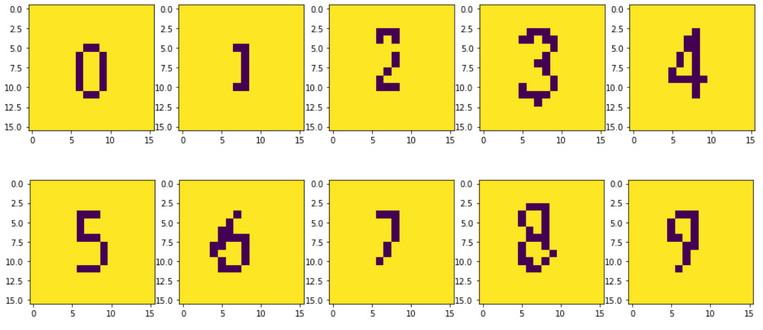



In [ ]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Importing PreProcessed Data extracted from images provided in the assignment
data = np.load("/content/Images_final.npy")

**Step 2 -** (3 pts) Design and develop a single-layer perceptron (SLP) in Python, using libraries such as PyTorch (and, if necessary, Tensor Flow).  Your SLP must function in autoassociative mode (i.e., as an associative memory that accepts an element of  (i.e., a 16x16-pixel image) as input, and when the SLP is functioning correctly outputs the same element of).

We have used Keras for creating a sequential model of the following architecture.

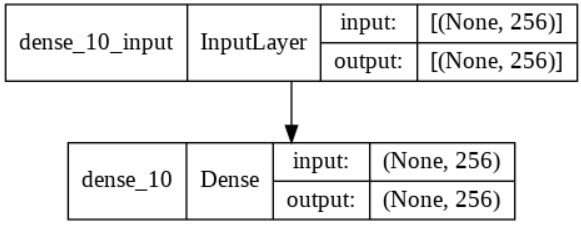

In [ ]:
#Defining the single layer neural network
#Keras sequential provides basic node to node connection to layers in their instantiated order
from keras.models import Sequential
#The dense layer implements the basic op = activation((kernel * input)+bias) operation
from keras.layers import Dense
model = Sequential()
#Since we are in autoassociative mode the output is of the same domain as that of the image 
#Hence model input will be 256 (16*16) in shape and the output will have the same dimension
#Sigmoid is used as the activation function however, tanh would also suffice provided the later preprocessing is proper
#We do not use ReLu as we require an image on the other end and not binary output on the other end
model.add(Dense(256, input_dim=256, activation="sigmoid"))
#model.add(Dense(256, activation="sigmoid"))

In [ ]:
#We use binary_crossentropy as it is what is used for multilabel classifications
#Other optimizers such as SGD perform very poorly even on high number of epochs hence we chose the standard optimizer
# Adam
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [ ]:
# Your result will be a Fully-Connected Network with Image Output:  Here, we have
# 16x16 = 256 inputs, and n = 256x256 = 64K weights, and 256 output nodes that 
# are valued ideally at 0 or 1, but will actually vary over the interval [0,1]. 
# So your output image will be 16x16 pixels (256 pixel values), hence the 256 output nodes.
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
Total params: 65,792
Trainable params: 65,792
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# To properly form the input vector x = (x1, x2, ..., x256)  you will assemble 
# the 256 output nodes in normal (row-wise) scanning order to form the 16x16-pixel 
# output image.
flrows = list()
for i in range(10):
  flrows.append(data[i].flatten())
nflrows = np.array(flrows)

In [ ]:
# Input and output is same as we are expecting autoassociative outputs
model.fit(nflrows, nflrows, epochs=400)

Epoch 1/400
1/1 [==============================] - 0s 384ms/step - loss: 0.8195
Epoch 2/400
1/1 [==============================] - 0s 7ms/step - loss: 0.7115
Epoch 3/400
1/1 [==============================] - 0s 6ms/step - loss: 0.6158
Epoch 4/400
1/1 [==============================] - 0s 16ms/step - loss: 0.5322
Epoch 5/400
1/1 [==============================] - 0s 11ms/step - loss: 0.4600
Epoch 6/400
1/1 [==============================] - 0s 7ms/step - loss: 0.3985
Epoch 7/400
1/1 [==============================] - 0s 11ms/step - loss: 0.3467
Epoch 8/400
1/1 [==============================] - 0s 8ms/step - loss: 0.3035
Epoch 9/400
1/1 [==============================] - 0s 7ms/step - loss: 0.2676
Epoch 10/400
1/1 [==============================] - 0s 9ms/step - loss: 0.2381
Epoch 11/400
1/1 [==============================] - 0s 8ms/step - loss: 0.2139
Epoch 12/400
1/1 [==============================] - 0s 7ms/step - loss: 0.1942
Epoch 13/400
1/1 [==============================] - 0s 1

In [ ]:
# Threshold utility function to be used fh and ffa
def threshImg(img):
  # Accepts any image and will perform thresholding according to threshold 0.5 
  x1 = list()
  for i in img:
    if i >= 0.5:
      x1.append(1)
    else:
      x1.append(0)
  x1 = np.array(x1)
  return x1

**Step 3** - (3 pts) Train your SLP on the 10 images that comprise the dataset developed in Step 1), above.  You will want to test your SLP to ensure it functions correctly as an autoassociative memory before you go on to Step 4.  Document your training results, as discussed here:

You get credit for showing your preliminary test results and discussing the number of training epochs (iterations through the backpropagation algorithm), then explaining why you need that many iterations.

EpochWise Image here

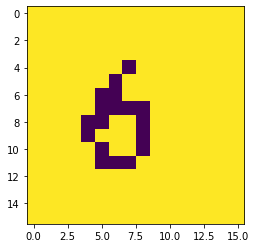

In [ ]:
plt.imshow(nflrows[6].reshape(16,16))

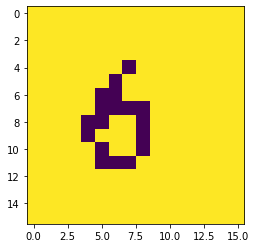

In [ ]:
plt.imshow(threshImg(model.predict(nflrows[6].reshape(1,-1))[0]).reshape(16,16))

**Step 4** - (3 pts) Test your SLP on the entire dataset that you trained on in Step 3), above -- with no noise introduced into the input dataset, using the following procedure:

**Step 4a:**  Apply your trained SLP in autoassociative mode to the dataset **X**, collecting output data in a test dataset **Y**

**Step 4b:**  Compute metrics (described below) called fraction-of-hits (Fh) and fraction-of-false-alarms (Ffa):

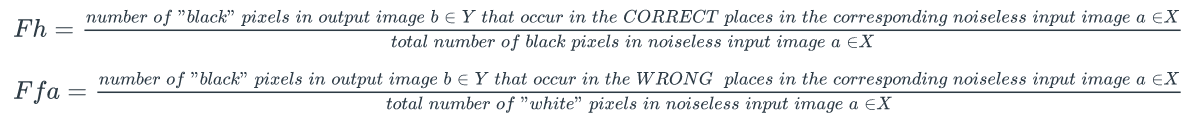

**Step 4c:** Graph Fh as a function of Ffa for each exemplar in the input dataset -- your output will look like a scatter plot with Fh on the ordinate (vertical axis, ranging in value from 0 to 1) and Ffa on the abscissa (horizontal axis, ranging in value from 0 to 1).  You can use a small triangle or small hollow circle for each data point.

In [ ]:
#fh = black in output at correct place/black pixel count in correct image
#make all black pixels white and all white pixels black for both images and then add the two images the correct ones will be 
#over 1, take their sum
def fh(expNum, predicted):
  #Fetch the actual number image from actual data
  actual = nflrows[expNum]
  #Invert the actual image
  actualInv = np.array([0 if i==1 else 1 for i in actual])
  #Invert the predicted Image
  predictedInv = np.array([0 if i==1 else 1 for i in predicted])
  #Add the images, make every coinciding pixel total go up to 2
  intSum = actualInv + predictedInv
  #Threshold the image 
  intSumThresh = np.array([1 if i>1 else 0 for i in intSum])
  #Find the score, the sum will make it equivalent to counting all the black colliding pixels
  fhScore = sum(intSumThresh)/sum(actualInv)
  return fhScore

In [ ]:
#ffa = black in wrong places/ white pixels count in original
def ffa(expNum, predicted):
  #Fetch the actual number image from actual data
  actual = nflrows[expNum]
  #Invert the actual image
  actualInv = np.array([0 if i==1 else 1 for i in actual])
  #Invert the predicted Image
  predictedInv = np.array([0 if i==1 else 1 for i in predicted])
  #Find the score
  ffaScore = sum(actualInv-predictedInv)/sum(actual)
  return abs(ffaScore)

In [ ]:
# Before we add actual noise we will test the model on a noisy "2" input image 
corruptImg = np.array([[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

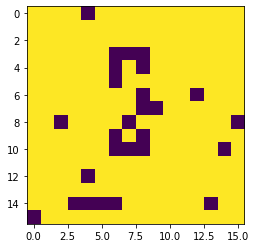

In [ ]:
#This is what the corrupted "2" image looks like
plt.imshow(corruptImg[0].reshape(16,16))

In [ ]:
corruptImgPrediction = model.predict(corruptImg[0].reshape(1,-1))

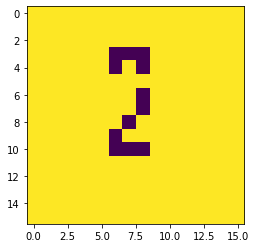

In [ ]:
# Expected Output (From real data)
plt.imshow(nflrows[2].reshape(16,16))

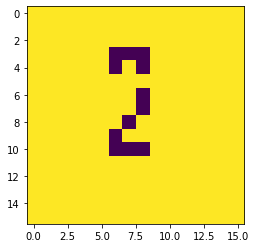

In [ ]:
# Actual Predicted Output
plt.imshow(threshImg(corruptImgPrediction[0]).reshape(16,16))

In [ ]:
# A good prediction will have 100% score on fraction of hit score (fh=1.0)
fh(2,threshImg(corruptImgPrediction[0]))

1.0

In [ ]:
# A good prediction will have 0% fraction of false alarms score (ffa=0.0)
ffa(2, threshImg(corruptImgPrediction[0]))

0.0

Plotting fh vs ffa for varying number of epochs [50,100,200,400]

Epoch 1/50
1/1 [==============================] - 0s 372ms/step - loss: 0.8232
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 0.7156
Epoch 3/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6204
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 0.5372
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.4654
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 0.4041
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3523
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 0.3089
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2729
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2431
Epoch 11/50
1/1 [==============================] - 0s 14ms/step - loss: 0.2185
Epoch 12/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1983
Epoch 13/50
1/1 [==============================] - 0s 5ms/step - loss

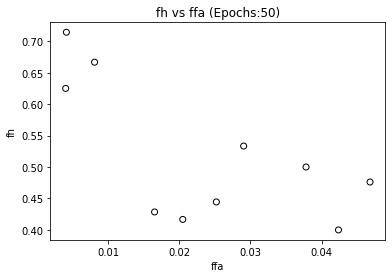

Epoch 1/100
1/1 [==============================] - 0s 375ms/step - loss: 0.8579
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7471
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6484
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.5618
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4866
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4223
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3678
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3221
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2840
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2525
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2266
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2053
Epoch 13/100
1/1 [==============================] - 0s 7ms/

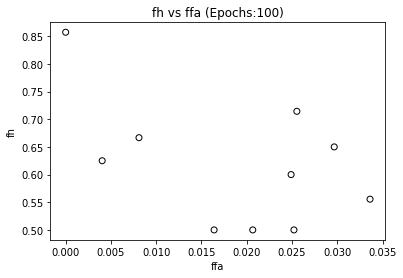

Epoch 1/200
1/1 [==============================] - 0s 360ms/step - loss: 0.7865
Epoch 2/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6814
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 0.5890
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 0.5088
Epoch 5/200
1/1 [==============================] - 0s 6ms/step - loss: 0.4401
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 0.3818
Epoch 7/200
1/1 [==============================] - 0s 7ms/step - loss: 0.3329
Epoch 8/200
1/1 [==============================] - 0s 9ms/step - loss: 0.2922
Epoch 9/200
1/1 [==============================] - 0s 13ms/step - loss: 0.2586
Epoch 10/200
1/1 [==============================] - 0s 14ms/step - loss: 0.2309
Epoch 11/200
1/1 [==============================] - 0s 9ms/step - loss: 0.2082
Epoch 12/200
1/1 [==============================] - 0s 14ms/step - loss: 0.1897
Epoch 13/200
1/1 [==============================] - 0s 7

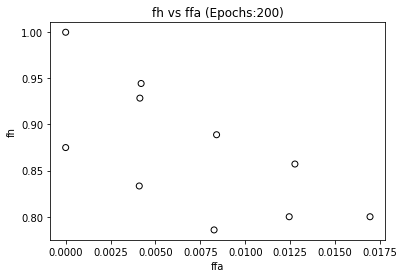

Epoch 1/400
1/1 [==============================] - 0s 356ms/step - loss: 0.8009
Epoch 2/400
1/1 [==============================] - 0s 8ms/step - loss: 0.6949
Epoch 3/400
1/1 [==============================] - 0s 7ms/step - loss: 0.6012
Epoch 4/400
1/1 [==============================] - 0s 11ms/step - loss: 0.5195
Epoch 5/400
1/1 [==============================] - 0s 10ms/step - loss: 0.4493
Epoch 6/400
1/1 [==============================] - 0s 9ms/step - loss: 0.3896
Epoch 7/400
1/1 [==============================] - 0s 6ms/step - loss: 0.3395
Epoch 8/400
1/1 [==============================] - 0s 10ms/step - loss: 0.2978
Epoch 9/400
1/1 [==============================] - 0s 9ms/step - loss: 0.2632
Epoch 10/400
1/1 [==============================] - 0s 6ms/step - loss: 0.2346
Epoch 11/400
1/1 [==============================] - 0s 7ms/step - loss: 0.2111
Epoch 12/400
1/1 [==============================] - 0s 8ms/step - loss: 0.1918
Epoch 13/400
1/1 [==============================] - 0s 9

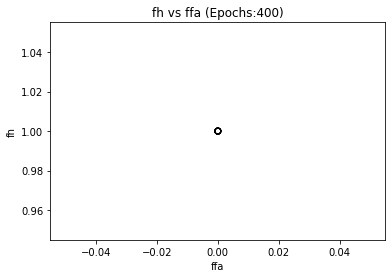

In [ ]:
for eN in [50,100,200,400]:
  modelTemp = Sequential()
  modelTemp.add(Dense(256, input_dim=256, activation="sigmoid"))
  modelTemp.compile(loss='binary_crossentropy', optimizer='Adam')
  modelTemp.fit(nflrows, nflrows, epochs=eN)
  for i in range(10):
    modelOp = modelTemp.predict(nflrows[i].reshape(1,-1))
    plt.scatter(ffa(i, threshImg(modelOp[0])), fh(i, threshImg(modelOp[0])), facecolors='none', edgecolors='black')
  plt.xlabel('ffa')
  plt.ylabel('fh')
  plt.title('fh vs ffa (Epochs:{})'.format(eN))
  plt.plot()
  plt.show()
  del(modelTemp)

#### The result from the above cell would collated is as follows

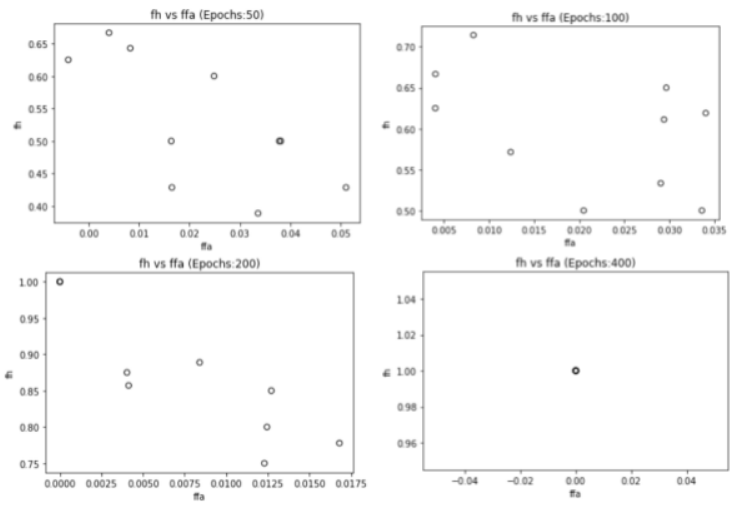

[]

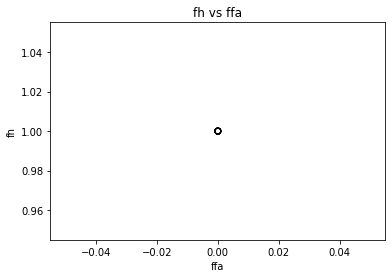

In [ ]:
#Fh as a function of Ffa for each exemplar in the input dataset -- your output will look like a scatter plot with Fh 
#on the ordinate (vertical axis, ranging in value from 0 to 1) and Ffa on the abscissa (horizontal axis, ranging in 
#value from 0 to 1).  You can use a small triangle or small hollow circle for each data point.

for i in range(10):
  modelOp = model.predict(nflrows[i].reshape(1,-1))
  plt.scatter(ffa(i, threshImg(modelOp[0])), fh(i, threshImg(modelOp[0])), facecolors='none', edgecolors='black')
plt.xlabel('ffa')
plt.ylabel('fh')
plt.title('fh vs ffa')
plt.plot()

**Step 5 -** (3 pts) Perturb your dataset (the 10 images that you developed in Step 1), above) by adding noise, and saving the performance results, so you can display them as described in Step 6.

* Noise will be Gaussian-distributed with approximately 10 percent cross-section (e.g., 25 noise pixels out of 16x16 = 256 pixels per image) and have zero mean, and standard deviation of (0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, and 0.1) [yes, that's nine cases!!] .
* Algorithm:  (1) generate random noise with std-dev as described above, (2) add noise values to input image every 10 pixels or so (chosen randomly), (3) renormalize the noise-corrupted image so all of its pixels have values in the interval [0,1].


In [ ]:
mangledData = np.load('/content/perturbed_data.npy')

In [ ]:
actualTrain = list()
for i in mangledData[:70,1]:
  actualTrain.append(i.flatten())
actualTrain = np.array(actualTrain)

predictedTrain = list()
for i in mangledData[:70,0]:
  predictedTrain.append(i.flatten())
predictedTrain = np.array(predictedTrain)

actualTest = list()
for i in mangledData[71:,1]:
  actualTest.append(i.flatten())
actualTest = np.array(actualTest)

predictedTest = list()
for i in mangledData[71:,0]:
  predictedTest.append(i.flatten())
predictedTest = np.array(predictedTest)

actual = list()
for i in mangledData[:,1]:
  actual.append(i.flatten())
actual = np.array(actual)

predicted = list()
for i in mangledData[:,0]:
  predicted.append(i.flatten())
predicted = np.array(predicted)

### X

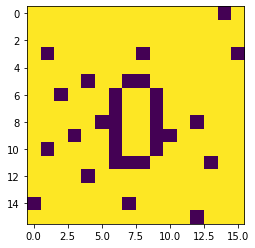

In [ ]:
plt.imshow(actualTrain[0].reshape(16,16))

### Y

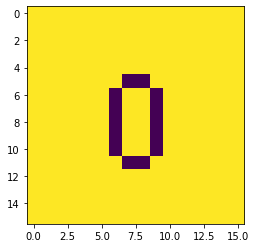

In [ ]:
plt.imshow(predictedTrain[0].reshape(16,16))

**Step 6** - (3 pts) Display Data from your Tests in Step 5), above, as follows:

**Step 6a:** Gather your results into a table of Fh and Ffa versus test-image-ID, with one column per each value of the standard deviation, like this:

**Step 6b:** Make a very nice-appearing scatter-plot graph of Fh versus Ffa with each noise standard deviation (stdev) value represented on a logarithmically-scaled abscissa whose values range from 0 to 0.1 in steps of 0.001, and with the Fh and Ffa values represented on the linearly-scaled ordinate whose values range from 0 to 1 in steps of 0.1.  Please label the abscissa as "Gaussian Noise Level (stdev, at 10 pct xsecn)" and the ordinate as "Fh and Ffa".  The graph should have a title in the frame that says, "Graph of Fh and Ffa vs. Noise Standard Deviation for noise-corrupted Alphanumeric Imagery (16x16 pixels) for Autoassociative Single-Layer Perceptron".


In [ ]:
stddvs = [0.001,0.002,0.003,0.005,0.01, 0.02, 0.03, 0.05, 0.1]

In [ ]:
finalTable = pd.DataFrame()
for i in range(9):
  colNameFH = "stddv-{}_fh".format(stddvs[i])
  colNameFFA = "stddv-{}_ffa".format(stddvs[i])
  fhcoords = []
  ffacoords = []
  for j in range(10):
    fhcoords.append(fh(j, threshImg(model.predict(actual[(i*10)+j].reshape(1,-1))[0])))
    ffacoords.append(ffa(j, threshImg(model.predict(actual[(i*10)+j].reshape(1,-1))[0])))
  finalTable[colNameFH] = fhcoords
  finalTable[colNameFFA] = ffacoords

In [ ]:
finalTable.to_csv('modelOp.csv')

In [ ]:
def getCoords():
  fhcoords = []
  ffacoords = []
  for i in range(9):
    for j in range(10):
      fhcoords.append((stddvs[i], fh(j, threshImg(model.predict(actual[(i*10)+j].reshape(1,-1))[0]))))
      ffacoords.append((stddvs[i], ffa(j, threshImg(model.predict(actual[(i*10)+j].reshape(1,-1))[0]))))
  return fhcoords, ffacoords

In [ ]:
fhcoords, ffacoords = getCoords()

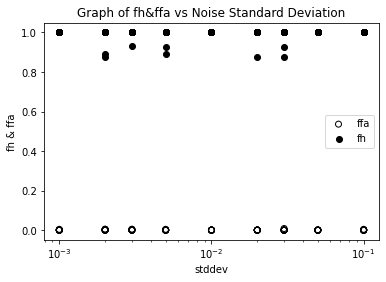

In [ ]:
for i in ffacoords:
  plt.scatter(i[0], i[1], facecolors='none', edgecolors='black')
plt.scatter(i[0], i[1], facecolors='none', edgecolors='black', label='ffa')

for i in fhcoords:
  plt.scatter(i[0], i[1], facecolors='black', edgecolors='black')
plt.scatter(i[0], i[1], facecolors='black', edgecolors='black', label='fh')

plt.ylabel("fh & ffa")
plt.xlabel("stddev")
plt.xscale("log")
plt.title("Graph of fh&ffa vs Noise Standard Deviation")
plt.legend()
plt.show()

**Step 8 (1 point) -** Build a Two- or Three-Layer Shallow Multilayer Neural Net (SMNN) that functions as an autoassociative memory, and optimize it for classifying the training/test set developed in Step 1 (similar to Steps 2 and 3).

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
noiseModel2 = Sequential()
noiseModel2.add(Dense(256, input_dim=256, activation="relu"))
noiseModel2.add(Dense(256, input_dim=256, activation="relu"))
noiseModel2.add(Dense(256, input_dim=256, activation="relu"))
noiseModel2.add(Dense(256, activation="sigmoid"))

In [ ]:
noiseModel2.compile(loss='binary_crossentropy', optimizer='Adam')

In [ ]:
numData = np.load("/content/Images_final.npy")

In [ ]:
alphaData = np.load('/content/charImages_final.npy')

In [ ]:
flrows = list()
for i in range(10):
  flrows.append(numData[i].flatten())

for i in range(26):
  flrows.append(alphaData[i].flatten())

nnflrows = np.array(flrows)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
noiseModel2 = Sequential()
noiseModel2.add(Dense(256, input_dim=256, activation="relu"))
noiseModel2.add(Dense(256, input_dim=256, activation="relu"))
noiseModel2.add(Dense(256, input_dim=256, activation="relu"))
noiseModel2.add(Dense(256, activation="sigmoid"))

In [ ]:
noiseModel2.compile(loss='binary_crossentropy', optimizer='Adam')

In [ ]:
noiseModel2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               65792     
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 dense_20 (Dense)            (None, 256)               65792     
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
Total params: 263,168
Trainable params: 263,168
Non-trainable params: 0
_________________________________________________________________


In [ ]:
noiseModel2.fit(actual, predicted, epochs=400)

Epoch 1/400
3/3 [==============================] - 1s 9ms/step - loss: 0.6533
Epoch 2/400
3/3 [==============================] - 0s 8ms/step - loss: 0.4560
Epoch 3/400
3/3 [==============================] - 0s 9ms/step - loss: 0.2487
Epoch 4/400
3/3 [==============================] - 0s 8ms/step - loss: 0.1382
Epoch 5/400
3/3 [==============================] - 0s 7ms/step - loss: 0.1132
Epoch 6/400
3/3 [==============================] - 0s 9ms/step - loss: 0.1091
Epoch 7/400
3/3 [==============================] - 0s 7ms/step - loss: 0.1035
Epoch 8/400
3/3 [==============================] - 0s 8ms/step - loss: 0.1018
Epoch 9/400
3/3 [==============================] - 0s 8ms/step - loss: 0.0999
Epoch 10/400
3/3 [==============================] - 0s 7ms/step - loss: 0.0966
Epoch 11/400
3/3 [==============================] - 0s 7ms/step - loss: 0.0964
Epoch 12/400
3/3 [==============================] - 0s 10ms/step - loss: 0.0948
Epoch 13/400
3/3 [==============================] - 0s 10ms/

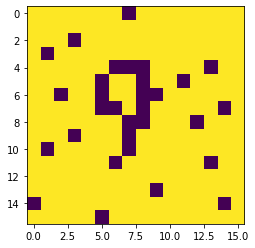

In [ ]:
plt.imshow(actual[89].reshape(16,16))

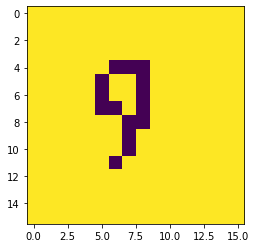

In [ ]:
plt.imshow(threshImg(noiseModel2.predict(actual[89].reshape(1,-1))[0]).reshape(16,16))

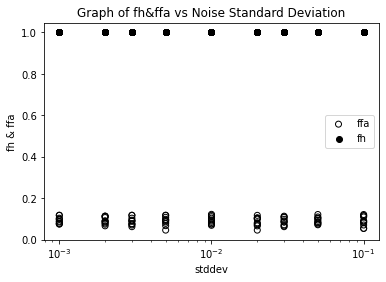

In [ ]:
def getSMNNCoords():
  fhcoords = []
  ffacoords = []
  for i in range(9):
    for j in range(10):
      fhcoords.append((stddvs[i], fh(j, noiseModel2.predict(actual[(i*10)+j].reshape(1,-1))[0])))
      ffacoords.append((stddvs[i], ffa(j, noiseModel2.predict(actual[(i*10)+j].reshape(1,-1))[0])))
  return fhcoords, ffacoords

fhDirtycoords, ffaDirtycoords = getSMNNCoords()


for i in ffaDirtycoords:
  plt.scatter(i[0], i[1], facecolors='none', edgecolors='black')
plt.scatter(i[0], i[1], facecolors='none', edgecolors='black', label='ffa')
for i in fhDirtycoords:
  plt.scatter(i[0], i[1], facecolors='black', edgecolors='black')
plt.scatter(i[0], i[1], facecolors='black', edgecolors='black', label='fh')
plt.ylabel("fh & ffa")
plt.xlabel("stddev")
plt.xscale("log")
plt.title("Graph of fh&ffa vs Noise Standard Deviation")
plt.legend()
plt.show()

SMNN Train with Clean Data

Epoch 1/40
1/1 [==============================] - 1s 532ms/step - loss: 0.7218
Epoch 2/40
1/1 [==============================] - 0s 13ms/step - loss: 0.6686
Epoch 3/40
1/1 [==============================] - 0s 10ms/step - loss: 0.6281
Epoch 4/40
1/1 [==============================] - 0s 14ms/step - loss: 0.5795
Epoch 5/40
1/1 [==============================] - 0s 15ms/step - loss: 0.5182
Epoch 6/40
1/1 [==============================] - 0s 10ms/step - loss: 0.4476
Epoch 7/40
1/1 [==============================] - 0s 15ms/step - loss: 0.3735
Epoch 8/40
1/1 [==============================] - 0s 11ms/step - loss: 0.3032
Epoch 9/40
1/1 [==============================] - 0s 14ms/step - loss: 0.2431
Epoch 10/40
1/1 [==============================] - 0s 16ms/step - loss: 0.1971
Epoch 11/40
1/1 [==============================] - 0s 13ms/step - loss: 0.1652
Epoch 12/40
1/1 [==============================] - 0s 13ms/step - loss: 0.1450
Epoch 13/40
1/1 [==============================] - 0s 11ms/s

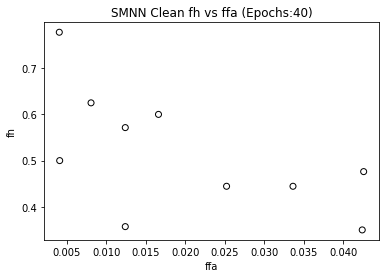

Epoch 1/80
1/1 [==============================] - 1s 533ms/step - loss: 0.7098
Epoch 2/80
1/1 [==============================] - 0s 17ms/step - loss: 0.6435
Epoch 3/80
1/1 [==============================] - 0s 11ms/step - loss: 0.5922
Epoch 4/80
1/1 [==============================] - 0s 10ms/step - loss: 0.5336
Epoch 5/80
1/1 [==============================] - 0s 15ms/step - loss: 0.4653
Epoch 6/80
1/1 [==============================] - 0s 11ms/step - loss: 0.3931
Epoch 7/80
1/1 [==============================] - 0s 9ms/step - loss: 0.3243
Epoch 8/80
1/1 [==============================] - 0s 9ms/step - loss: 0.2652
Epoch 9/80
1/1 [==============================] - 0s 11ms/step - loss: 0.2188
Epoch 10/80
1/1 [==============================] - 0s 19ms/step - loss: 0.1836
Epoch 11/80
1/1 [==============================] - 0s 11ms/step - loss: 0.1571
Epoch 12/80
1/1 [==============================] - 0s 10ms/step - loss: 0.1375
Epoch 13/80
1/1 [==============================] - 0s 15ms/ste

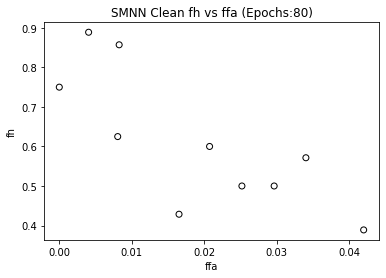

Epoch 1/120
1/1 [==============================] - 0s 500ms/step - loss: 0.7086
Epoch 2/120
1/1 [==============================] - 0s 12ms/step - loss: 0.6379
Epoch 3/120
1/1 [==============================] - 0s 10ms/step - loss: 0.5788
Epoch 4/120
1/1 [==============================] - 0s 12ms/step - loss: 0.5134
Epoch 5/120
1/1 [==============================] - 0s 13ms/step - loss: 0.4378
Epoch 6/120
1/1 [==============================] - 0s 10ms/step - loss: 0.3590
Epoch 7/120
1/1 [==============================] - 0s 16ms/step - loss: 0.2870
Epoch 8/120
1/1 [==============================] - 0s 10ms/step - loss: 0.2282
Epoch 9/120
1/1 [==============================] - 0s 12ms/step - loss: 0.1843
Epoch 10/120
1/1 [==============================] - 0s 12ms/step - loss: 0.1538
Epoch 11/120
1/1 [==============================] - 0s 12ms/step - loss: 0.1336
Epoch 12/120
1/1 [==============================] - 0s 11ms/step - loss: 0.1214
Epoch 13/120
1/1 [==============================

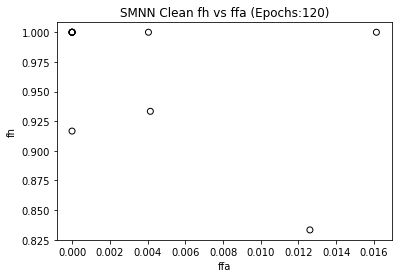

Epoch 1/180
1/1 [==============================] - 1s 502ms/step - loss: 0.6939
Epoch 2/180
1/1 [==============================] - 0s 13ms/step - loss: 0.6391
Epoch 3/180
1/1 [==============================] - 0s 12ms/step - loss: 0.5885
Epoch 4/180
1/1 [==============================] - 0s 12ms/step - loss: 0.5282
Epoch 5/180
1/1 [==============================] - 0s 12ms/step - loss: 0.4595
Epoch 6/180
1/1 [==============================] - 0s 11ms/step - loss: 0.3884
Epoch 7/180
1/1 [==============================] - 0s 17ms/step - loss: 0.3210
Epoch 8/180
1/1 [==============================] - 0s 8ms/step - loss: 0.2619
Epoch 9/180
1/1 [==============================] - 0s 9ms/step - loss: 0.2135
Epoch 10/180
1/1 [==============================] - 0s 10ms/step - loss: 0.1765
Epoch 11/180
1/1 [==============================] - 0s 10ms/step - loss: 0.1502
Epoch 12/180
1/1 [==============================] - 0s 15ms/step - loss: 0.1320
Epoch 13/180
1/1 [==============================] 

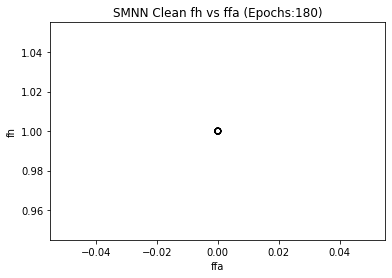

In [ ]:
for eN in [40,80,120,180]:
  modelTemp = Sequential()
  modelTemp.add(Dense(256, input_dim=256, activation="relu"))
  modelTemp.add(Dense(256, input_dim=256, activation="relu"))
  modelTemp.add(Dense(256, input_dim=256, activation="relu"))
  modelTemp.add(Dense(256, activation="sigmoid"))
  modelTemp.compile(loss='binary_crossentropy', optimizer='Adam')
  modelTemp.fit(nflrows, nflrows, epochs=eN)
  for i in range(10):
    modelOp = modelTemp.predict(nflrows[i].reshape(1,-1))
    plt.scatter(ffa(i, threshImg(modelOp[0])), fh(i, threshImg(modelOp[0])), facecolors='none', edgecolors='black')
  plt.xlabel('ffa')
  plt.ylabel('fh')
  plt.title('SMNN Clean fh vs ffa (Epochs:{})'.format(eN))
  plt.plot()
  plt.show()
  del(modelTemp)

## **Step 9 (2 points) -** 
Test Your Optimized SMNN on the Noise-Corrupted Data per Steps 4 through 6) -- This will be easy, because you will have already developed the algorithms and scripts for Fh, Ffa, tabulating, and graphing your results.

SMNN Train with Noisy Data

Epoch 1/20
3/3 [==============================] - 1s 10ms/step - loss: 0.6695
Epoch 2/20
3/3 [==============================] - 0s 7ms/step - loss: 0.5134
Epoch 3/20
3/3 [==============================] - 0s 7ms/step - loss: 0.2910
Epoch 4/20
3/3 [==============================] - 0s 7ms/step - loss: 0.1532
Epoch 5/20
3/3 [==============================] - 0s 7ms/step - loss: 0.1148
Epoch 6/20
3/3 [==============================] - 0s 7ms/step - loss: 0.1060
Epoch 7/20
3/3 [==============================] - 0s 8ms/step - loss: 0.1042
Epoch 8/20
3/3 [==============================] - 0s 7ms/step - loss: 0.1008
Epoch 9/20
3/3 [==============================] - 0s 10ms/step - loss: 0.0999
Epoch 10/20
3/3 [==============================] - 0s 7ms/step - loss: 0.0980
Epoch 11/20
3/3 [==============================] - 0s 8ms/step - loss: 0.0975
Epoch 12/20
3/3 [==============================] - 0s 7ms/step - loss: 0.0952
Epoch 13/20
3/3 [==============================] - 0s 8ms/step - loss: 

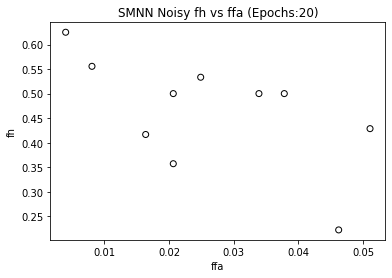

Epoch 1/40
3/3 [==============================] - 1s 8ms/step - loss: 0.6708
Epoch 2/40
3/3 [==============================] - 0s 7ms/step - loss: 0.5165
Epoch 3/40
3/3 [==============================] - 0s 7ms/step - loss: 0.3069
Epoch 4/40
3/3 [==============================] - 0s 7ms/step - loss: 0.1723
Epoch 5/40
3/3 [==============================] - 0s 8ms/step - loss: 0.1264
Epoch 6/40
3/3 [==============================] - 0s 7ms/step - loss: 0.1108
Epoch 7/40
3/3 [==============================] - 0s 7ms/step - loss: 0.1049
Epoch 8/40
3/3 [==============================] - 0s 7ms/step - loss: 0.1028
Epoch 9/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0998
Epoch 10/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0991
Epoch 11/40
3/3 [==============================] - 0s 10ms/step - loss: 0.0977
Epoch 12/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0960
Epoch 13/40
3/3 [==============================] - 0s 8ms/step - loss: 0

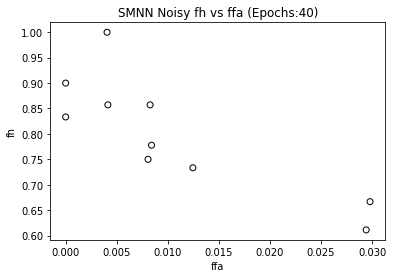

Epoch 1/60
3/3 [==============================] - 1s 8ms/step - loss: 0.6539
Epoch 2/60
3/3 [==============================] - 0s 8ms/step - loss: 0.4687
Epoch 3/60
3/3 [==============================] - 0s 10ms/step - loss: 0.2557
Epoch 4/60
3/3 [==============================] - 0s 8ms/step - loss: 0.1437
Epoch 5/60
3/3 [==============================] - 0s 9ms/step - loss: 0.1149
Epoch 6/60
3/3 [==============================] - 0s 8ms/step - loss: 0.1084
Epoch 7/60
3/3 [==============================] - 0s 8ms/step - loss: 0.1030
Epoch 8/60
3/3 [==============================] - 0s 9ms/step - loss: 0.0994
Epoch 9/60
3/3 [==============================] - 0s 8ms/step - loss: 0.0997
Epoch 10/60
3/3 [==============================] - 0s 8ms/step - loss: 0.0966
Epoch 11/60
3/3 [==============================] - 0s 9ms/step - loss: 0.0950
Epoch 12/60
3/3 [==============================] - 0s 9ms/step - loss: 0.0951
Epoch 13/60
3/3 [==============================] - 0s 8ms/step - loss: 0

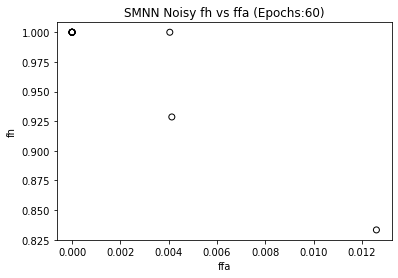

Epoch 1/80
3/3 [==============================] - 1s 8ms/step - loss: 0.6678
Epoch 2/80
3/3 [==============================] - 0s 8ms/step - loss: 0.5029
Epoch 3/80
3/3 [==============================] - 0s 7ms/step - loss: 0.2931
Epoch 4/80
3/3 [==============================] - 0s 7ms/step - loss: 0.1703
Epoch 5/80
3/3 [==============================] - 0s 8ms/step - loss: 0.1253
Epoch 6/80
3/3 [==============================] - 0s 7ms/step - loss: 0.1131
Epoch 7/80
3/3 [==============================] - 0s 7ms/step - loss: 0.1090
Epoch 8/80
3/3 [==============================] - 0s 8ms/step - loss: 0.1023
Epoch 9/80
3/3 [==============================] - 0s 10ms/step - loss: 0.1001
Epoch 10/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0980
Epoch 11/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0957
Epoch 12/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0948
Epoch 13/80
3/3 [==============================] - 0s 9ms/step - loss: 0

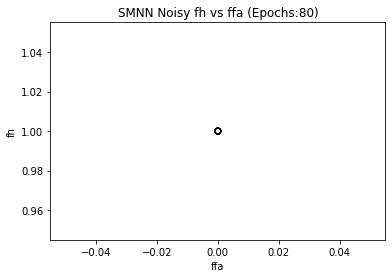

In [ ]:
modelTemp = Sequential()
for eN in [20,40,60,80]:
  modelTemp = Sequential()
  modelTemp.add(Dense(256, input_dim=256, activation="relu"))
  modelTemp.add(Dense(256, input_dim=256, activation="relu"))
  modelTemp.add(Dense(256, input_dim=256, activation="relu"))
  modelTemp.add(Dense(256, activation="sigmoid"))
  modelTemp.compile(loss='binary_crossentropy', optimizer='Adam')
  modelTemp.fit(actual, predicted, epochs=eN)
  for i in range(10):
    modelOp = modelTemp.predict(nflrows[i].reshape(1,-1))
    plt.scatter(ffa(i, threshImg(modelOp[0])), fh(i, threshImg(modelOp[0])), facecolors='none', edgecolors='black')
  plt.xlabel('ffa')
  plt.ylabel('fh')
  plt.title('SMNN Noisy fh vs ffa (Epochs:{})'.format(eN))
  plt.plot()
  plt.show()

In [ ]:
finalTable = pd.DataFrame()
for i in range(9):
  colNameFH = "stddv-{}_fh".format(stddvs[i])
  colNameFFA = "stddv-{}_ffa".format(stddvs[i])
  fhcoords = []
  ffacoords = []
  for j in range(10):
    fhcoords.append(fh(j, threshImg(modelTemp.predict(actual[(i*10)+j].reshape(1,-1))[0])))
    ffacoords.append(ffa(j, threshImg(modelTemp.predict(actual[(i*10)+j].reshape(1,-1))[0])))
  finalTable[colNameFH] = fhcoords
  finalTable[colNameFFA] = ffacoords

In [ ]:
finalTable

,stddv-0.001_fh,stddv-0.001_ffa,stddv-0.002_fh,stddv-0.002_ffa,stddv-0.003_fh,stddv-0.003_ffa,stddv-0.005_fh,stddv-0.005_ffa,stddv-0.01_fh,stddv-0.01_ffa,stddv-0.02_fh,stddv-0.02_ffa,stddv-0.03_fh,stddv-0.03_ffa,stddv-0.05_fh,stddv-0.05_ffa,stddv-0.1_fh,stddv-0.1_ffa
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


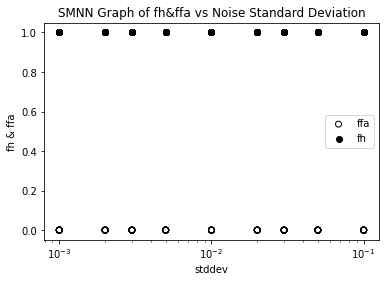

In [ ]:
def getSMNNCoords():
  fhcoords = []
  ffacoords = []
  for i in range(9):
    for j in range(10):
      fhcoords.append((stddvs[i], fh(j, threshImg(modelTemp.predict(actual[(i*10)+j].reshape(1,-1))[0]))))
      ffacoords.append((stddvs[i], ffa(j, threshImg(modelTemp.predict(actual[(i*10)+j].reshape(1,-1))[0]))))
  return fhcoords, ffacoords

fhDirtycoords, ffaDirtycoords = getSMNNCoords()


for i in ffaDirtycoords:
  plt.scatter(i[0], i[1], facecolors='none', edgecolors='black')
plt.scatter(i[0], i[1], facecolors='none', edgecolors='black', label='ffa')
for i in fhDirtycoords:
  plt.scatter(i[0], i[1], facecolors='black', edgecolors='black')
plt.scatter(i[0], i[1], facecolors='black', edgecolors='black', label='fh')
plt.ylabel("fh & ffa")
plt.xlabel("stddev")
plt.xscale("log")
plt.title("SMNN Graph of fh&ffa vs Noise Standard Deviation")
plt.legend()
plt.show()

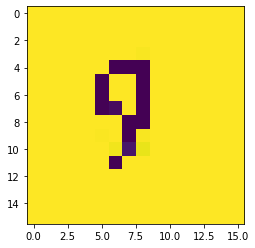

In [ ]:
plt.imshow(modelTemp.predict(actual[79].reshape(1,-1)).reshape(16,16))